In [10]:
#python3
#libraries required are opencv, numpy
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


In [47]:
def PSNR(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )      #MSE
    if mse == 0:
        return -1 #psnr is infinite and both the image are same
    return 20*math.log10(255.0/mse**0.5)      #formula for PSNR

def Reverse(J,N): 
    
    X=np.float32(J)
    for i in range(N):
        #J_=f(X)
        #J_=cv.GaussianBlur(X,(15,15),5)
        #residue=np.subtract(J,J_)
        #X=np.add(np.dot(X,0.5),np.multiply(residue,0.5))
        X = X+J-cv.bilateralFilter(X,15,75,75)
        #X=np.uint8(X)
    return X


In [54]:

#######################main.py########################

im=cv.imread('bird.png')
#_J=cv.GaussianBlur(im,(7,7),3)
J=cv.bilateralFilter(im,15,75,75)
tmp=[]
tmp_PSNR=[]
for i in range(3,20):
    X=Reverse(J,i)
    tmp.append(X)
    tmp_PSNR.append(PSNR(im,X))

k=tmp_PSNR.index(max(tmp_PSNR))
X_=tmp[k]
#cv2.medianBlur(img,5)
#X_=Reverse(J,5)
X_=np.uint8(X_)
#cv.imwrite('Reverse_bird.jpg',X_)

#cv.imwrite('Filtered.jpg',J)
#cv.imwrite('BLurred_bird.jpg',J)

print(PSNR(im,X_))
print(PSNR(im,J))


38.32728572094264
35.60088855383833


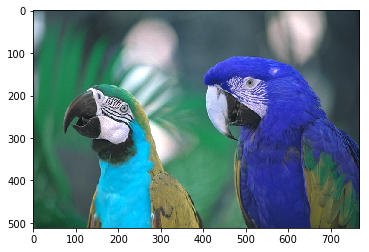

In [55]:
plt.imshow(im)

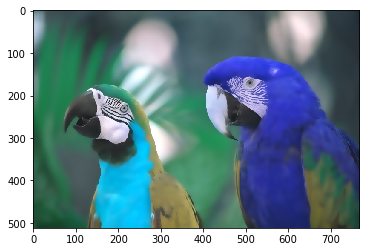

In [56]:
plt.imshow(J)

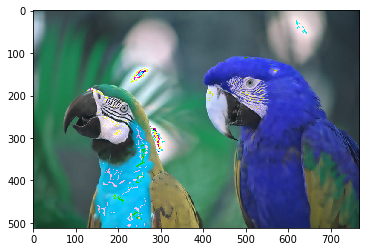

In [57]:
plt.imshow(np.uint8(X_))

In [52]:
np.mean((im-X_)**2)

9.539247

In [53]:
np.mean((im-J)**2)

17.90570831298828

In [61]:
cv.imwrite('Reverse_Bird.jpg',X_)
cv.imwrite('BLurred_bird.jpg',J)


True

In [60]:

#######################main.py########################

im=cv.imread('bird.png')
#_J=cv.GaussianBlur(im,(7,7),3)
J=cv.bilateralFilter(im,15,75,75)
tmp=[]
tmp_PSNR=[]
for i in range(3,100):
    X=Reverse(J,i)
    tmp.append(X)
    tmp_PSNR.append(PSNR(im,X))

k=tmp_PSNR.index(max(tmp_PSNR))
X_=tmp[k]
#cv2.medianBlur(img,5)
#X_=Reverse(J,5)
X_=np.uint8(X_)
#cv.imwrite('Reverse_bird.jpg',X_)

#cv.imwrite('Filtered.jpg',J)
#cv.imwrite('BLurred_bird.jpg',J)

print(PSNR(im,X_))
print(PSNR(im,J))


38.32728572094264
35.60088855383833


In [63]:
tmp=Reverse(J,150)
print(PSNR(im,X_))


38.32728572094264


In [64]:
print(PSNR(im,J))


35.60088855383833
